# William Lee NOTEBOOK

### Abstract:

  For the regression dataset I chose an Apple Stock pricing dataset that has date, the volume of that day's trade, and essential prices of the stock such as Open, High, Low, and Last prices on that day. I chose this dataset as I am curious to see how accurate a linear regression model is at predicting the high of stock prices. For the classification dataset I chose a dataset on various phone brands being sold in Amazon with data such as ratings, totalnumber of reviews and pricing. I chose this dataset to see if phone companies can be distinguished between price, rating, and reviews. I plan on using k-Neartest Neighbor for my classification algorithm. Over the course of this notebook I hope to finally be able to visualize concepts we leanred in class with actual data and to find any interesting correlation within the dataset.  

### Section 1: Regression Dataset Prep

For the regression dataset prep on Apple stock columns that are included is date, last, volume, open, high, and low. Date is the date of the recording of the stock price takes place. Last is the price of the stock end of that day (most likely when market closed). Volume is the amount of trades on the apple stock at that particular day. High is the maximum price the stock was at that day and low is the minimum price.


In [191]:
import pandas as pd 

df = pd.read_csv("HistoricalQuotes.csv", dtype={'Open':float})
df = df.rename(columns = {'Close/Last': 'Last'})

df.head(15)

,Date,Last,Volume,Open,High,Low
0,2/28/2020,273.36,106721200,257.26,278.41,256.37
1,2/27/2020,273.52,80151380,281.10,286.00,272.96
2,2/26/2020,292.65,49678430,286.53,297.88,286.50
3,2/25/2020,288.08,57668360,300.95,302.53,286.13
4,2/24/2020,298.18,55548830,297.26,304.18,289.23
5,2/21/2020,313.05,32426420,318.62,320.45,310.50
6,2/20/2020,320.30,25141490,322.63,324.65,318.21
7,2/19/2020,323.62,23495990,320.00,324.57,320.00
8,2/18/2020,319.00,38190550,315.36,319.75,314.61
9,2/14/2020,324.95,20028450,324.74,325.98,322.85


In [192]:
#clean up data chart possibly 
clean = df[['Last','Volume', 'Open', 'High', 'Low']]
clean = clean[clean.Volume < 1e8]
clean = clean[clean.High <= 250]
clean.head(15)

,Last,Volume,Open,High,Low
81,248.76,34790520,247.24,249.17,237.26
82,243.26,31130520,244.76,245.30,241.21
83,243.29,35709870,248.97,249.75,242.57
84,249.05,24143240,247.42,249.25,246.72
85,246.58,18369300,243.16,246.73,242.88
86,243.58,17916260,244.51,244.80,241.81
87,243.18,19932550,242.10,243.24,241.22
88,239.96,22684000,241.16,242.20,239.62
89,240.51,22367480,237.52,240.99,237.32
90,236.41,24377170,234.59,237.58,234.29


### Section 2: Regression

Text(0, 0.5, 'High')

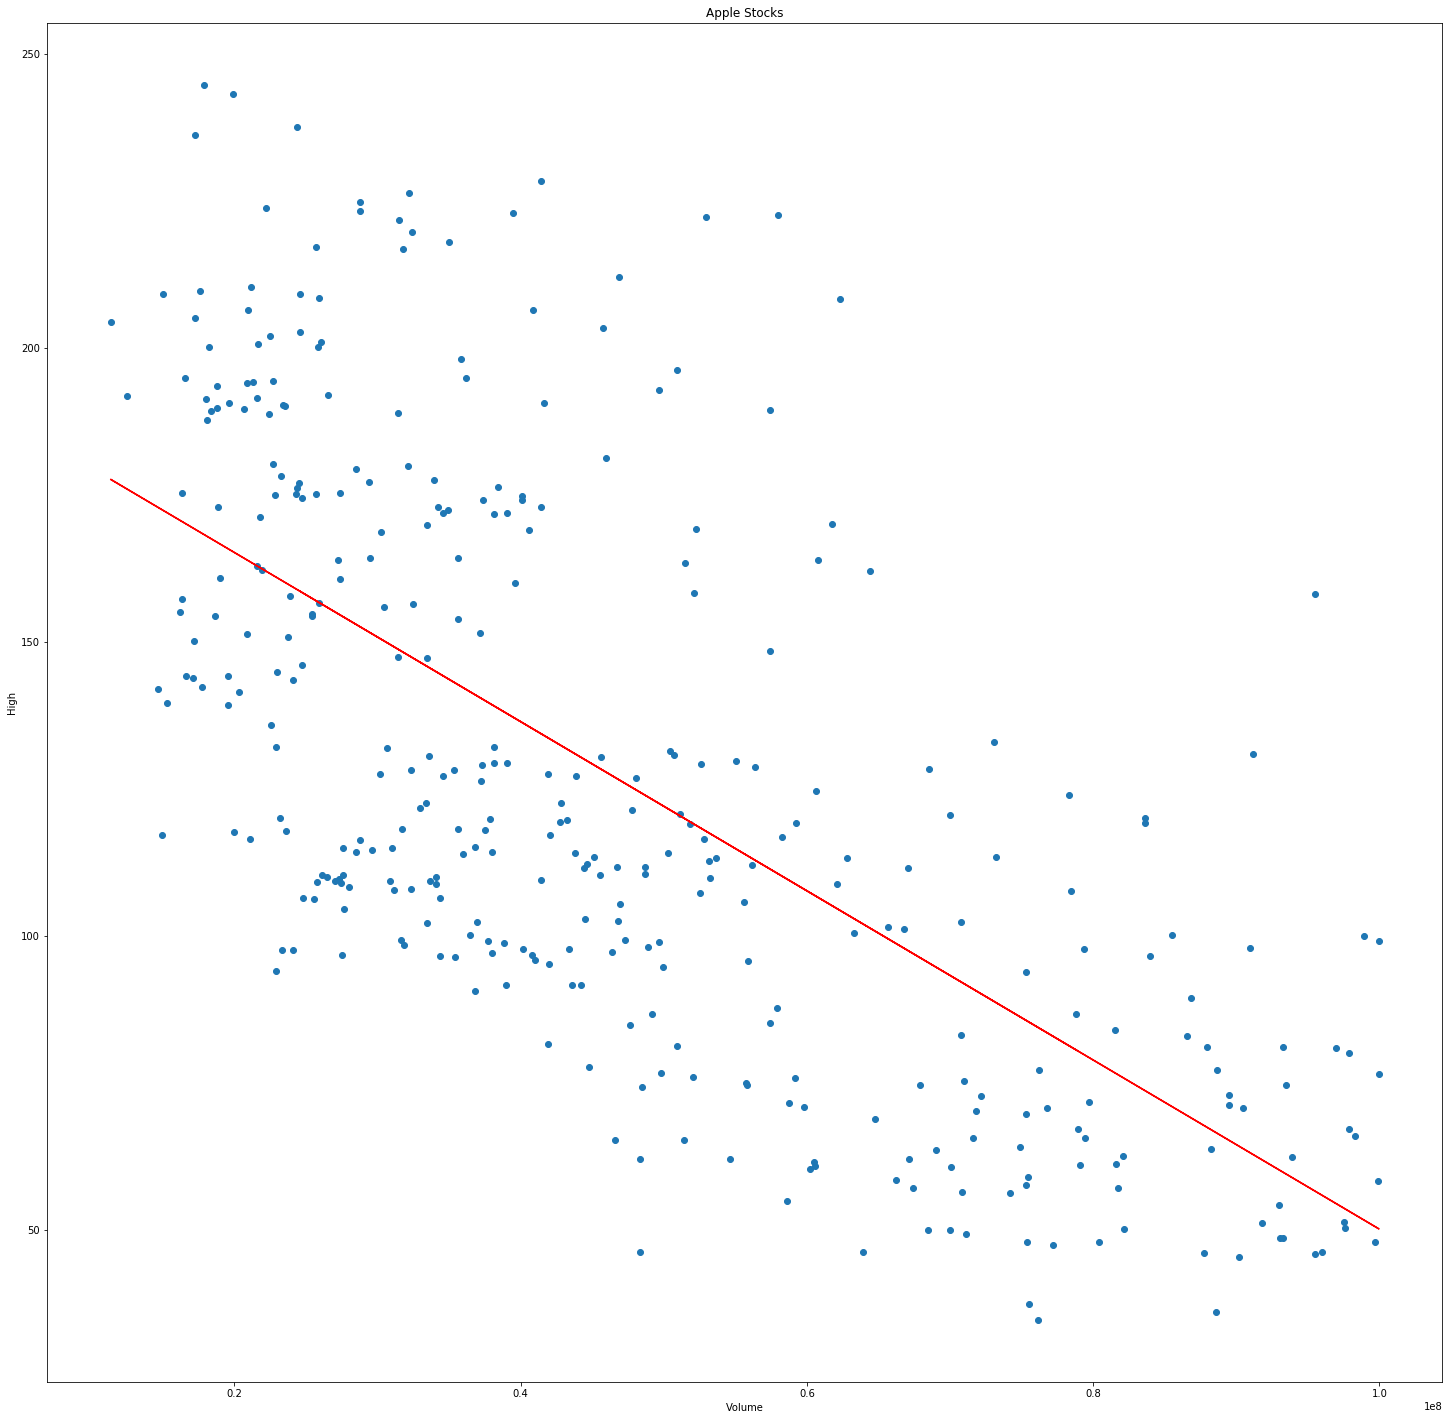

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

X = clean[['Volume']]
y = clean['High']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = linear_model.LinearRegression()
model = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

plt.figure(figsize=(25,25))
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred, color='red')
plt.title("Apple Stocks")
plt.xlabel("Volume")
plt.ylabel("High")

In [194]:
# Accuracy and Mean Error for Linear Regression 

from sklearn import metrics
print("Accuracy: ", model.score(X_test,y_test)*100, "%")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))                                        

Accuracy:  44.836069562493705 %
Mean Absolute Error: 30.66142336684314
Mean Squared Error:  1373.3854058170127


In [195]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold 
kf = model_selection.KFold(n_splits=5)
results_kfold = model_selection.cross_val_score(model,X_train, y_train, cv=kf)
print("K-Fold Accuracy")
for i in range (len(results_kfold)):
    print(results_kfold[i] * 100,"%") 
    

K-Fold Accuracy
43.56722947598516 %
49.75268747918453 %
45.39256816632541 %
44.31031018481476 %
44.60333984202206 %


### Section 3: Classification Dataset Prep

For the classifiction dataset on Phones purchased on Amazon it has columns asin, brand, title, url, image, rating, reviewUrl, totalReviews, price, and originalPrice. For this classication I will only be using brand, rating totalReview, and price. Brand is the name of the phone's manufactorer. Rating is a number system ranging from 1 to 5 for that particular phone. Totalreview is the total number of review that phone has on Amazon and price is the pricing of the phone on Amazon.  

In [196]:
df = pd.read_csv("20191226-items.csv")
df = df[['brand', 'rating', 'totalReviews', 'price']]
df = df[df.price > 0]
df = df[(df["brand"] == "Samsung") | (df["brand"] == "Apple") | (df["brand"] == "Google") | (df["brand"] == "OnePlus") | (df["brand"] == "HUAWEI")]
df.head(15)

,brand,rating,totalReviews,price
9,Samsung,3.3,57,64.99
10,Samsung,2.6,78,99.99
11,Samsung,3.6,70,179.00
13,Samsung,3.4,16,99.99
14,Samsung,3.6,22,64.94
15,Samsung,3.2,107,199.99
16,Samsung,3.5,146,79.99
22,Samsung,3.7,84,14.99
24,Samsung,2.5,10,249.99
25,Samsung,3.4,305,97.69


In [197]:
#Mapping Data 
df['brand_num'] = df.brand.map({'Samsung': 1, 'Apple': 2, 'Google': 3, 'OnePlus': 4, 'HUAWEI': 5})
df = df[['brand_num', 'rating', 'totalReviews', 'price']]
df.head(15)

,brand_num,rating,totalReviews,price
9,1,3.3,57,64.99
10,1,2.6,78,99.99
11,1,3.6,70,179.00
13,1,3.4,16,99.99
14,1,3.6,22,64.94
15,1,3.2,107,199.99
16,1,3.5,146,79.99
22,1,3.7,84,14.99
24,1,2.5,10,249.99
25,1,3.4,305,97.69


#### Sumamry of Data Mapping:

- 1 - Samsung 
- 2 - Apple
- 3 - Google 
- 4 - OnePlus
- 5 - HUAWEI

### Section 4: Classification

In [198]:
X2 = df[['rating', 'totalReviews','price']]
y2 = df['brand_num']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

In [199]:
#K-Nearest Neighbor Algorithm

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
model_knn = knn.fit(X2_train, y2_train)
y2_pred = knn.predict(X2_test)
print("Accuracy: ", model_knn.score(X2_test,y2_test)*100, "%")
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y2_test, y2_pred))    

Accuracy:  57.49999999999999 %
Mean Absolute Error: 0.8375
Mean Squared Error:  2.1625


In [200]:
#K-Fold Cross Validation 

kf = model_selection.KFold(n_splits=5)
results_kfold = model_selection.cross_val_score(model_knn,X2_train, y2_train, cv=kf)
print("K-Fold Accuracy for K")
for i in range (len(results_kfold)):
    print(results_kfold[i] * 100,"%") 

K-Fold Accuracy for K
67.1875 %
65.625 %
59.375 %
70.3125 %
64.0625 %


### Conclusions

In the linear regression, my feature was volume of the stock and the prediction was on the high of the stock. As seen with the scatter plot, volume and high have a negative correlation which meant that the greater the volume the lower the high would be and vise versa. This makes sense as there's more volume for a stock the prices tend to fluctuate a lot therefore the overall maximum price can't be too high as prices would change at a faster pace than when volume is lower. The linear regression turned out to have about 45% accuracy and an mean square error of around 1330 which is relatively average considering the range of prices. The K-fold cross validation of five splits on the linear regression returned with varying results but overall yield higher accuracy than linear regression alone with the highest being about 50% accurate. 

In the classification on phones of different brands sold on Amazon the features were rating, total reviews, and price and the classification was brand number. For this dataset I wanted to see whether rating, total reviews, and price of a phone can accurately determine which brand of phone it is. To accomplish this I used the K- nearest neighbor algorithm which yield about 58% accuracy amd a mean squared error of 2.1625. When K-fold cross validation was implemented to this classification algorithm with five splits it yielded even greater accuracy, the highest being around 70%. 

To my surprise the classification of phones sold on Amazon using k-nearest neighbors was more accurate than linear regression on apple stock data. I thought that stock prices would be easy to predict even though linear regression would probably not be the best method.  

To extend the project further, it would be interesting in having these model be fed new information and have it predict the outcome. For example, I would give it last week's data on the volume of Apple stock trades and see how accurate the linear regression predicted prices will be to the actual prices. As for classification I will compare k-nearest neighbor algorithm with the other classification algorithms to see which algorithm performs best in classifying this particular data on phones.